# Chicago case study

Some miscelaneous investigation of the data

In [1]:
%matplotlib inline
from common import *

In [2]:
datadir = os.path.join("..", "..", "..", "..", "Data")
#datadir = os.path.join("/media", "disk", "Data")
northside, grid = load(datadir)

In [3]:
import lzma
with lzma.open(os.path.join(datadir, "chicago_all.csv.xz"), "rt") as file:
    points = open_cp.sources.chicago.load(file, "BURGLARY", type="all")

In [4]:
mask = (points.timestamps >= np.datetime64("2016-01-01")) & (points.timestamps < np.datetime64("2017-01-01"))
points = points[mask]
points = open_cp.geometry.intersect_timed_points(points, northside)

In [5]:
points.time_range, points.number_data_points

((numpy.datetime64('2016-01-01T01:00:00.000'),
  numpy.datetime64('2016-12-31T10:54:00.000')),
 1222)

In [6]:
start_date = datetime.datetime(2016, 1, 1)
end_date = datetime.datetime(2016, 12, 31)

counts = []
start = start_date
while start <= end_date:
    end = start + datetime.timedelta(days=1)
    pts = points[(points.timestamps >= start) & (points.timestamps < end)]
    counts.append(pts.number_data_points)
    start = end

(array([ 14.,  51.,  74.,  72.,  63.,  41.,  26.,  14.,   5.,   6.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Patch objects>)

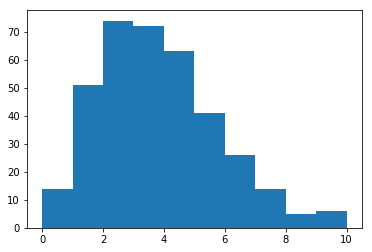

In [7]:
plt.hist(counts, bins=np.arange(11))

In [8]:
sum(counts) / len(counts)

3.33879781420765